# フーリエ級数
$$
\begin{align*}
a_k &= \frac{1}{\pi}\int_{[-\pi, \pi]}f(t)\cos kt\ dt\\
b_k &= \frac{1}{\pi}\int_{[-\pi, \pi]}f(t)\sin kt\ dt
\end{align*}
$$
とするとき、
$$\frac{a_0}{2} + \sum_{k = 1}^{+\infty}(a_k \cos kt + b_k\sin kt)$$
を関数$f$のフーリエ級数と呼ぶ。また、負でない整数$n$について
$$\frac{a_0}{2} + \sum_{k = 1}^{n}(a_k \cos kt + b_k\sin kt)$$
を関数$f$のフーリエ級数の第$n$部分和という。さらに、
$$c_k = \frac{1}{2\pi}\int_{[-\pi, \pi]}f(t)\exp(-ikt)\ dt$$
としたとき、
$$\frac{a_0}{2} + \sum_{k = 1}^{+\infty}(a_k \cos kt + b_k\sin kt) = \sum_{k = -\infty}^{+\infty}c_k\exp(ikt)$$

$
\begin{align*}
f(x) =
\begin{cases}
1 & (-\frac{\pi}{2} < x < \frac{\pi}{2})\\
-1 & otherwise
\end{cases}
\end{align*}
$
をフーリエ級数展開すると、
$$
f(x) = \sum_{k = 0}^{+\infty}(-1)^n\frac{4}{(2n + 1)\pi}\cos((2n + 1)x)
$$

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

<IPython.core.display.Javascript object>


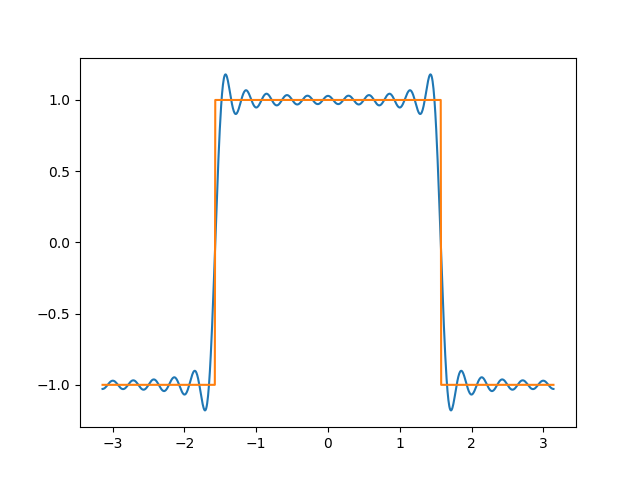

In [17]:
n = 10

a, b = -1, 1
N = 1000

def f(x, n):
    result = 0

    for i in range(n + 1):
        result += (-1) ** i * 4 / ((2 * i + 1) * np.pi) * np.cos((2 * i + 1) * x)
    
    return result

def g(x):
    return 1 if abs(x) <= np.pi / 2 else -1

# proccess
x = [(a + (b - a) / N * i) * np.pi for i in range(N + 1)]
y = [f(i, n) for i in x]
plt.plot(x, y)
plt.plot(x, [g(i ) for i in x])
plt.savefig("fourier" + str(n) + ".png")

<IPython.core.display.Javascript object>


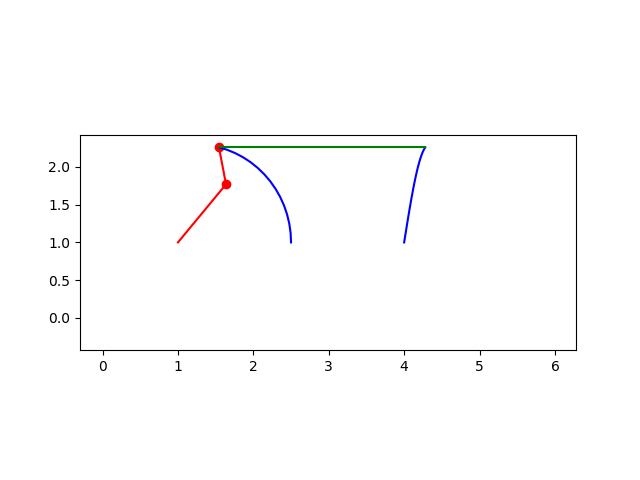

In [52]:
# 円の描写
a = [1, 1]
r = 1
M = 100
fig = plt.figure()
ims = []
x = []
y = []

for i in range(M):
    theta = 2 * np.pi * i / M
    s = a[0] + r * np.cos(theta)
    t = a[1] + r * np.sin(theta)
    s_1 = s + .5 * np.cos(2 * theta)
    t_1 = t + .5 * np.sin(2 * theta)
    x.append(s_1)
    y.append(t_1)
    
    plt.gca().set_aspect('equal', adjustable='box')
    ims.append(plt.plot([a[0], s, s_1], [a[1], t, t_1], c = 'r') + plt.plot([s], [t], marker = 'o', c = 'r') + plt.plot([s_1], [t_1], marker = 'o', c = 'r') + plt.plot(x, y, c = 'b') + plt.plot([4 + 2 * j / M for j in range(i + 1)], y, c = 'b') + plt.plot([s_1, 4 + 2 * i / M], [t_1, y[-1]], c = 'g'))
ani = animation.ArtistAnimation(fig, ims, interval = 40)
ani.save('test.gif', writer = 'imagemagick')
    